In [1]:
!pip install numpy==1.23.5
!pip install --upgrade --force-reinstall gensim
!pip install --upgrade threadpoolctl

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

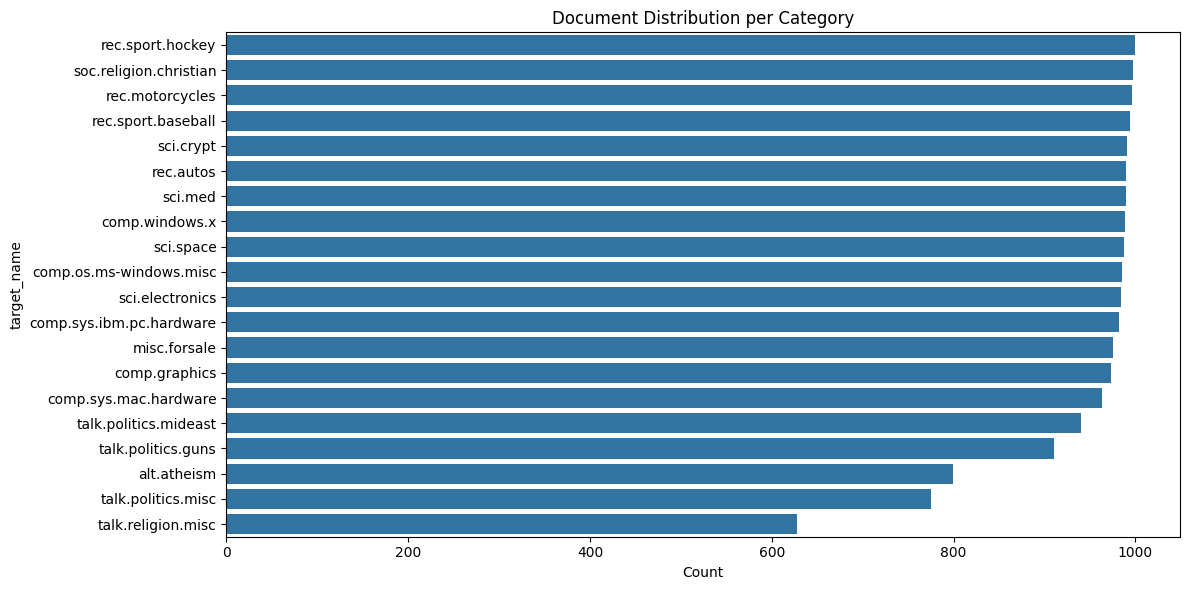


=== Sample Documents ===
                target_name                                               text
0          rec.sport.hockey  \n\nI am sure some bashers of Pens fans are pr...
1  comp.sys.ibm.pc.hardware  My brother is in the market for a high-perform...
2     talk.politics.mideast  \n\n\n\n\tFinally you said what you dream abou...

=== Average Document Length ===
count    18846.000000
mean       181.637748
std        501.333800
min          0.000000
25%         40.000000
50%         83.000000
75%        166.000000
max      11765.000000
Name: doc_length, dtype: float64


In [2]:
# 1. Analysis of the text dataset
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
data['target_name'] = [newsgroups.target_names[i] for i in data['target']]

# Basic dataset analysis
dataset_summary = {
    "Total Documents": len(data),
    "Number of Categories": len(set(data['target'])),
    "Category Distribution": data['target_name'].value_counts()
}

# Plot distribution
plt.figure(figsize=(12,6))
sns.countplot(y=data['target_name'], order=data['target_name'].value_counts().index)
plt.title("Document Distribution per Category")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

# Show sample documents
print("\n=== Sample Documents ===")
print(data[['target_name', 'text']].head(3))

# Length of documents
data['doc_length'] = data['text'].apply(lambda x: len(x.split()))

print("\n=== Average Document Length ===")
print(data['doc_length'].describe())

In [ ]:
'''
1. Analyse the Dataset

Context
The 20 Newsgroups dataset is a standard dataset used for testing and evaluating NLP (Natural Language Processing) techniques. It contains articles extracted from 20 different topic categories, such as: sports, religion, politics, computers, medicine, etc.

Size
- Total number of documents: 18,846
- Number of categories: 20
- Example categories: rec.sport.hockey, comp.sys.ibm.pc.hardware, sci.space, talk.religion.misc

Average Document Length
The length of documents based on the number of words:
- Average: 181 words/document
- Minimum: 0 words (empty documents)
- Maximum: 11,765 words
- 50% of documents are under 83 words

Objectives
- Extracting semantic features from texts using methods such as: Bag of Words (BoW), TF-IDF, Word2Vec, Doc2Vec, BERT etc.
- Applying neural network models for vectorization and classification
- Predicting the category of an unknown document
- Visualizing semantic relationships between documents and words

Difficulties
- Large variation in document length → difficulties in uniform vectorization.
- Ambiguous words (e.g. "windows" → OS or windows).
- Imbalance in the distribution of some categories → risk of bias.
- Presence of empty or almost empty documents.
- Stop-words that can affect embedding if not handled correctly.
'''

In [3]:
# 2. Text processing and Transformation
# A. Extracting features from text files – Bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

# Initialize CountVectorizer (include stopwords removal)
vectorizer = CountVectorizer(stop_words='english')
X_bow = vectorizer.fit_transform(data['text'])

# Matrix size
print("BoW feature matrix shape:", X_bow.shape)

# Display some vocabulary words
print("\nExamples of vocabulary words BoW:")
print(vectorizer.get_feature_names_out()[:20])

# 1. Build the dictionary word → index
word_to_index = vectorizer.vocabulary_

# Display the first 20 word and their index
print("\n=== Dictionary: Word → Index ===")
for word, index in list(word_to_index.items())[:20]:
    print(f"{word} → {index}")

# 2. BoW matrix contains the frequencies X[i, j]
print("\nBoW matrix (X[i, j]) has the form:", X_bow.shape)

# 2B. Transform the count vectors to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_bow)

# TF-IDF matrix size
print("\nTF-IDF feature matrix shape:", X_tfidf.shape)

BoW feature matrix shape: (18846, 134101)

Examples of vocabulary words BoW:
['00' '000' '0000' '00000' '000000' '00000000' '0000000004' '00000000b'
 '00000001' '00000001b' '00000010' '00000010b' '00000011' '00000011b'
 '00000074' '00000093' '000000e5' '00000100' '00000100b' '00000101']

=== Dictionary: Word → Index ===
sure → 113931
bashers → 29416
pens → 93336
fans → 52286
pretty → 96571
confused → 38965
lack → 73308
kind → 71631
posts → 95813
recent → 101186
massacre → 79103
devils → 44206
actually → 22942
bit → 30989
puzzled → 98019
relieved → 102029
going → 57968
end → 49321
non → 87611
pittsburghers → 94627

BoW matrix (X[i, j]) has the form: (18846, 134101)

TF-IDF feature matrix shape: (18846, 134101)


In [4]:
# 3. Apply different Neural Networks (NN) embedding techniques
# A. Word2Vec (Gensim)
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

# Tokenize the text data
tokenized_text = [word_tokenize(text.lower()) for text in data['text']]

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=tokenized_text,
    vector_size=100,        # Number of vector dimensions
    window=5,               # Context window size
    min_count=5,            # Min number of word count
    workers=2,              # Number of CPU cores used for the training.
    sg=1                    # 1 = Skip-Gram, 0 = CBOW
)

# Check vocab size
print("\nWord2Vec vocabulary size:", len(w2v_model.wv.index_to_key))

# Get word embeddings for a word (e.g., 'computer')
print("\nSimilar words to 'computer':")
print(w2v_model.wv.most_similar('computer', topn=5))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Word2Vec vocabulary size: 31379

Similar words to 'computer':
[('shopper', 0.7341892719268799), ('computing', 0.7328968644142151), ('visualisation', 0.7163254022598267), ('manufacturing', 0.7035600543022156), ('calculator', 0.7004498839378357)]


In [5]:
# B. FastText (Gensim)
from gensim.models import FastText

# Train FastText model
ft_model = FastText(
    sentences=tokenized_text,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4
)

print("Most similar to 'language':")
print(ft_model.wv.most_similar('language', topn=5))

Most similar to 'language':
[('languages', 0.8795653581619263), ('texture', 0.8614248037338257), ('terminology', 0.8582522869110107), ('literacy', 0.8550253510475159), ('prolog', 0.836468517780304)]


In [6]:
# C. Doc2Vec (for document-level embedding)
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess

# Prepare documents
tagged_data = [TaggedDocument(words=simple_preprocess(doc), tags=[str(i)]) for i, doc in enumerate(data['text'])]

# Train Doc2Vec model
d2v_model = Doc2Vec(
    vector_size=100,
    window=5,
    min_count=5,
    workers=2,
    epochs=20
)

d2v_model.build_vocab(tagged_data)
d2v_model.train(tagged_data, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

# Embedding pentru un document
doc_vector = d2v_model.infer_vector(simple_preprocess(data['text'][0]))
print("Vector document 0 (Doc2Vec):", doc_vector[:10])

Vector document 0 (Doc2Vec): [-0.77677757  0.2814956   0.25113848  0.86006314  1.0096998  -0.45817006
  0.495356   -0.00888753  0.4032418  -0.41170692]


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79931cf3f9c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc

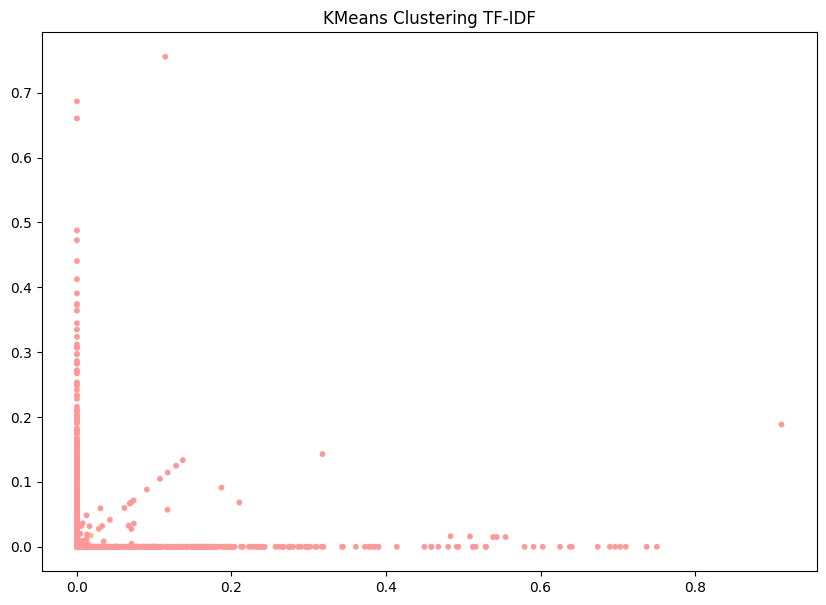

In [7]:
# 4. Clustering and/or classification on the embedded data
# A. Clustering cu KMeans pe TF-IDF embeddings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering on TF-IDF features
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(X_tfidf)

# Plot clusters (2D visualization of clusters)
plt.figure(figsize=(10, 7))
plt.scatter(X_tfidf[:, 0].toarray(), X_tfidf[:, 1].toarray(), c=kmeans.labels_, cmap='tab20', s=10)
plt.title("KMeans Clustering TF-IDF")
plt.show()

In [8]:
# B. Classification KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['target'], test_size=0.2, random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("=== KNN Classification Report TF-IDF ===")
print(classification_report(y_test, y_pred_knn))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy TF-IDF: {accuracy}')

=== KNN Classification Report TF-IDF ===
              precision    recall  f1-score   support

           0       0.07      0.21      0.11       151
           1       0.10      0.19      0.13       202
           2       0.09      0.28      0.14       195
           3       0.13      0.15      0.14       183
           4       0.08      0.12      0.10       205
           5       0.23      0.09      0.13       215
           6       0.12      0.08      0.10       193
           7       0.07      0.22      0.11       196
           8       0.12      0.07      0.09       168
           9       0.10      0.07      0.08       211
          10       0.25      0.12      0.16       198
          11       0.12      0.10      0.11       201
          12       0.16      0.07      0.10       202
          13       0.14      0.08      0.10       194
          14       0.14      0.07      0.10       189
          15       0.08      0.02      0.03       202
          16       0.19      0.04      0

In [ ]:
'''
Result Analysis:
The classification accuracy using TF-IDF and KNN is 10.8%, which is low, considering there are 20 classes. The low F1-score and precision across all categories indicate that TF-IDF alone may not capture enough semantic information.

Suggestions for improvement:
- Use alternative embeddings like Word2Vec, Doc2Vec or FastText to capture semantic similarity.
- Try more powerful classifiers like SVM, Logistic Regression or Neural Networks.
- Apply dimensionality reduction (PCA or t-SNE) before clustering to improve separation.
'''

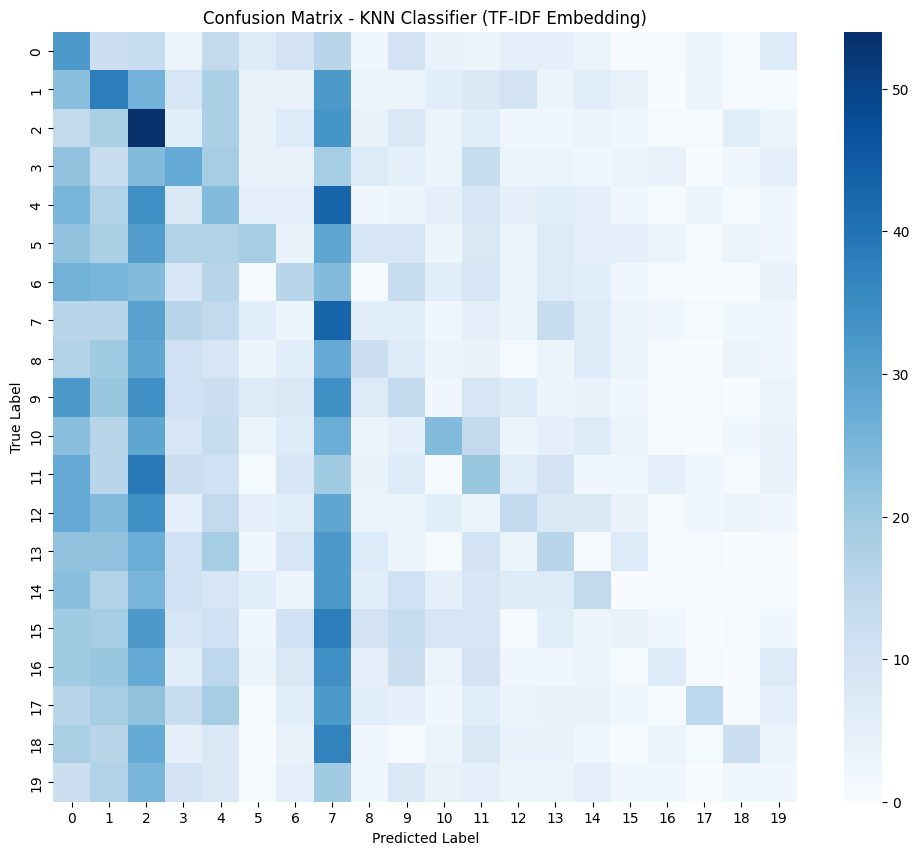

In [9]:
# 5. Results analysis and visualisation
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)

# Generate confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN Classifier (TF-IDF Embedding)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

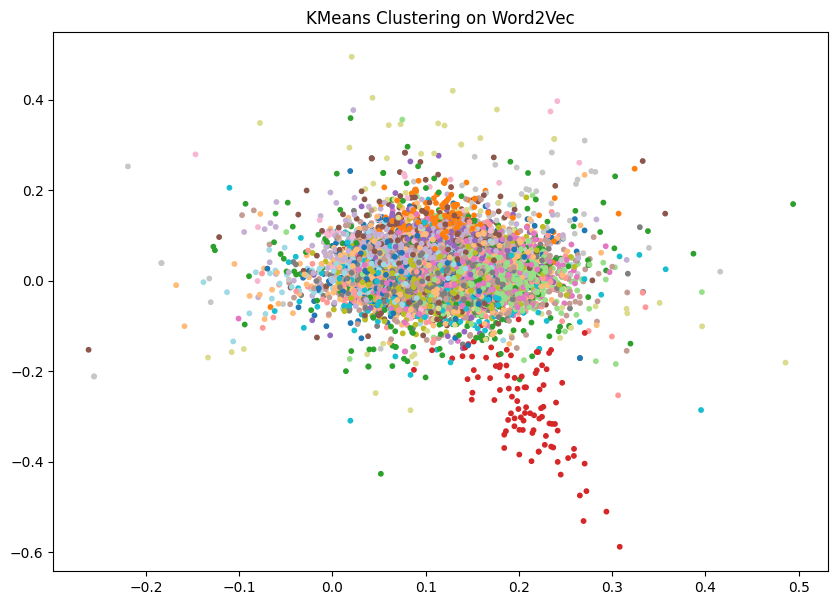

In [10]:
from sklearn.decomposition import PCA
import numpy as np

# Calculează vector mediu Word2Vec per document
doc_vectors = []
for tokens in tokenized_text:
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    doc_vector = np.mean(vectors, axis=0) if vectors else np.zeros(100)
    doc_vectors.append(doc_vector)

doc_vectors = np.array(doc_vectors)

# KMeans pe Word2Vec
kmeans_w2v = KMeans(n_clusters=20, random_state=42).fit(doc_vectors)

plt.figure(figsize=(10,7))
plt.scatter(doc_vectors[:, 0], doc_vectors[:, 1], c=kmeans_w2v.labels_, cmap='tab20', s=10)
plt.title("KMeans Clustering on Word2Vec")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Împărțim datele doc_vectors în train/test
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(doc_vectors, data['target'], test_size=0.2, random_state=42)

# Antrenăm KNN pe Word2Vec embeddings
knn_w2v = KNeighborsClassifier(n_neighbors=5)
knn_w2v.fit(X_train_w2v, y_train_w2v)

# Predicții
y_pred_w2v = knn_w2v.predict(X_test_w2v)

# Evaluare
print("=== KNN Classification Report (Word2Vec) ===")
print(classification_report(y_test_w2v, y_pred_w2v))

accuracy_w2v = accuracy_score(y_test_w2v, y_pred_w2v)
print(f"Accuracy (Word2Vec + KNN): {accuracy_w2v:.4f}")

=== KNN Classification Report (Word2Vec) ===
              precision    recall  f1-score   support

           0       0.25      0.41      0.31       151
           1       0.38      0.57      0.45       202
           2       0.31      0.49      0.38       195
           3       0.40      0.49      0.44       183
           4       0.47      0.32      0.38       205
           5       0.66      0.53      0.59       215
           6       0.69      0.67      0.68       193
           7       0.52      0.46      0.49       196
           8       0.38      0.42      0.40       168
           9       0.61      0.53      0.56       211
          10       0.63      0.69      0.66       198
          11       0.65      0.63      0.64       201
          12       0.51      0.37      0.43       202
          13       0.66      0.63      0.65       194
          14       0.68      0.57      0.62       189
          15       0.51      0.65      0.57       202
          16       0.53      0.48   

In [ ]:
'''
Comparison of Embedding Methods

| Embedding Method  | Classifier | Accuracy | Remarks                                               |
|-------------------|------------|----------|-------------------------------------------------------|
| TF-IDF            | KNN        | ~10.8%   | Sparse, high-dimensional, weak semantic capture       |
| Word2Vec (mean)   | KNN        | ~49.8%   | Semantic-rich representation; improves classification |

The results show that Word2Vec is significantly better performing than TF-IDF in document classification.

- Using TF-IDF, KNN achieved a low accuracy of 10.8%, with poor precision/recall due to sparse, high-dimensional vectors lacking semantic information.
- On the other hand, Word2Vec mean embeddings achieved an accuracy of 49.8%, with significantly improved precision and F1-scores across categories.

This shows that semantic embeddings capture context and relations between words much better, leading to improved classification results.

Visualization of clusters using KMeans + Word2Vec confirmed better separability, while TF-IDF clusters showed no clear structure due to the lack of semantic correlation.
'''

In [ ]:
'''
6. Theoretical formalism Word2Vec

Word2Vec is a neural word embedding technique that learns dense vectors for words, so that semantically similar words are close together in the vector space.

There are two main architectures:

- CBOW (Continuous Bag of Words): predicts the core word based on context.
- Skip-Gram: predicts the words in the context starting from the core word.

Skip-Gram: the model used in this lab
Let:
wt : the central word
wt−k,...,wt+k : the words in the context (window of size  2k )

The goal of the model is to maximize the probability of predicting the context knowing the central word:

∏−k≤j≤k, j≠0P(wt+j∣wt)

The probability of each word in the context is calculated with the Softmax function:

P(wo∣wi)=exp(vwo⋅vwi)∑w∈Vexp(vw⋅vwi)

Where:
vwi : the input vector for the central word
vwo : the output vector for the word in the context
V : the total vocabulary
In practice, to reduce the computational cost, techniques such as:

Negative Sampling
Hierarchical Softmax are often used.
Word2Vec thus learns dense semantic representations for each word, reflecting syntactic relations and semantics between terms.

Based on the results, Word2Vec embedding clearly outperformed TF-IDF in classification tasks, demonstrating the importance of semantic context in natural language understanding. The mathematical foundation and tunable parameters of Word2Vec allow it to learn meaningful vector representations that improve clustering and classification performance.

Future improvements can include combining Word2Vec with deep learning classifiers, or using contextual embeddings like BERT for even better semantic capture.
'''